<a href="https://colab.research.google.com/github/tommyliverani/RulFramework/blob/main/Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATASET
Library to process data in order to perform Rul prediction.
Main features:

*   compute_rul(feature): compute the rul field based on the feature passed as parameter

*   random_split(ratio): shuffle and split the data in training and test set using the ratio parameter

*   split_by_feature(feature, ratio): split the dataset based on the feature passed as parameter(without shuffle)









In [4]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import tensorflow_datasets as tfds
from Dataset import Dataset

##EXAMPLE: anomaly prediction

Each row of the dataset contains this fields:
*  node: the node's name
*  some features that describe the state of the node
*  is_rising_anomaly: can be 0 or 1

The library can compute the rul field counting the number of rows beetwin the selected row and the next anomaly.
Obviously if is_rising_anomaly is 1 rul is 0.



###BEFORE STARTING
Before using the library It's important to delete from the dataset the rows for which the rul field can't be computed.
Example:

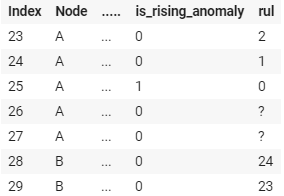

For rows number 26 and 27 the rul field can't be computed and must be deleted.

In [2]:
def select_rul(data):
    last_node=data['node'][0]
    last_anomaly=0
    for index,row in data.iterrows():
        if data['is_rising_anomaly'][index]==1:
            last_anomaly=index
        if last_node != data['node'][index]:
            for i in range(last_anomaly+1,index):
                data=data.drop(i)
        last_node = data['node'][index]
    for i in range(last_anomaly,data.index[-1]):
                data=data.drop(i+1)
    return data

In [3]:
url = 'https://raw.githubusercontent.com/tommyliverani/ExamonDataExtraction/master/examon-client-feature-newapi_py3/'

data= pd.read_csv(url + 'final_data/final_data_full.csv')
data=select_rul(data)


##COMPUTING RUL


NB: the computed rule is also normalized

In [5]:
dataset=Dataset(data)

In [6]:
dataset.full_data

,timestamp,node,avg:boottime,var:boottime,avg:bytes_in,var:bytes_in,avg:bytes_out,var:bytes_out,avg:cpu_aidle,var:cpu_aidle,avg:cpu_idle,var:cpu_idle,avg:cpu_nice,var:cpu_nice,avg:cpu_speed,var:cpu_speed,avg:cpu_steal,var:cpu_steal,avg:cpu_system,var:cpu_system,avg:cpu_user,var:cpu_user,avg:cpu_wio,var:cpu_wio,avg:disk_free,var:disk_free,avg:disk_total,var:disk_total,avg:load_fifteen,var:load_fifteen,avg:load_five,var:load_five,avg:load_one,var:load_one,avg:mem_buffers,var:mem_buffers,avg:mem_cached,var:mem_cached,avg:mem_free,var:mem_free,avg:mem_shared,var:mem_shared,avg:mem_total,var:mem_total,avg:part_max_used,var:part_max_used,avg:pkts_in,var:pkts_in,avg:pkts_out,var:pkts_out,avg:proc_run,var:proc_run,avg:proc_total,var:proc_total,avg:swap_free,var:swap_free,avg:swap_total,var:swap_total,gexec_0,machine_type_0,os_name_0,os_release_0,is_normal_state,is_non_rising_anomaly,is_rising_anomaly
0,2019-10-18 10:05:00+02:00,r169c03s01,0.0,0.0,0.001241,2.068363e-06,0.001776,1.952628e-06,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.142498,0.002955,0.968560,0.000315,0.0,0.0,0.997824,3.689334e-03,1.0,4.407686e-29,0.978847,0.000000,0.969758,3.442774e-07,0.950281,7.027665e-07,0.0,0.0,0.002533,0.000000e+00,0.956345,3.773780e-11,0.0,0.0,1.0,0.0,0.997743,0.0,0.014828,1.140149e-06,0.013392,1.930230e-06,0.028477,0.000434,0.000009,4.361038e-04,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,2019-10-18 10:10:00+02:00,r169c03s01,0.0,0.0,0.002177,4.235198e-06,0.002274,5.535008e-06,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.148716,0.002323,0.966899,0.000248,0.0,0.0,0.981264,5.993108e-04,1.0,0.000000e+00,0.978847,0.000000,0.969677,1.776915e-07,0.950159,2.871640e-07,0.0,0.0,0.002533,2.774520e-13,0.956325,7.495000e-08,0.0,0.0,1.0,0.0,0.997743,0.0,0.014480,3.893547e-05,0.014600,4.027201e-05,0.028556,0.001349,0.000010,4.393342e-03,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,2019-10-18 10:15:00+02:00,r169c03s01,0.0,0.0,0.000454,2.116223e-08,0.000330,3.309710e-10,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.145764,0.002246,0.967687,0.000240,0.0,0.0,0.986825,4.238182e-04,1.0,0.000000e+00,0.978847,0.000000,0.969802,4.432373e-07,0.950340,6.873827e-07,0.0,0.0,0.002533,0.000000e+00,0.956357,5.114142e-10,0.0,0.0,1.0,0.0,0.997743,0.0,0.002525,1.551870e-08,0.003430,1.432327e-08,0.028203,0.000000,0.000010,7.145620e-05,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,2019-10-18 10:20:00+02:00,r169c03s01,0.0,0.0,0.000241,2.860993e-08,0.000344,1.777200e-09,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.152044,0.003731,0.966010,0.000398,0.0,0.0,0.993352,2.361174e-03,1.0,4.407686e-29,0.978847,0.000000,0.969836,4.829006e-07,0.950525,1.914239e-06,0.0,0.0,0.002533,1.482634e-14,0.956278,8.557648e-08,0.0,0.0,1.0,0.0,0.997743,0.0,0.004180,1.831498e-05,0.003639,1.923904e-08,0.028360,0.000341,0.000009,3.890393e-04,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,2019-10-18 10:25:00+02:00,r169c03s01,0.0,0.0,0.000511,3.710120e-08,0.000281,1.217378e-09,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.126735,0.002177,0.972771,0.000232,0.0,0.0,0.989967,1.260728e-25,1.0,4.407686e-29,0.978847,0.000000,0.969650,3.604472e-31,0.950106,0.000000e+00,0.0,0.0,0.002533,1.331770e-13,0.956330,1.790940e-10,0.0,0.0,1.0,0.0,0.997743,0.0,0.011862,1.979380e-05,0.003227,6.635505e-08,0.028203,0.000000,0.000010,1.658853e-04,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103244,2019-12-31 21:15:00+01:00,r092c08s04,1.0,0.0,0.000114,8.162777e-09,0.000020,1.608078e-10,0.044586,0.0,0.899950,0.000150,0.0,0.0,0.0,0.0,0.0,0.0,0.045577,0.000019,0.085141,0.000104,0.0,0.0,0.311051,3.901273e-07,0.5,0.000000e+00,0.086801,0.000002,0.083022,2.332151e-07,0.076894,1.945176e-06,0.0,0.0,0.046164,9.396450e-11,0.80

In [7]:
dataset.compute_rul('is_rising_anomaly')

/content/Dataset.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.full_data['rul'][i]=index-i
/content/Dataset.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.full_data['rul'][index]=self.full_data['rul'][index]*1.0/max


In [8]:
dataset.full_data

,timestamp,node,avg:boottime,var:boottime,avg:bytes_in,var:bytes_in,avg:bytes_out,var:bytes_out,avg:cpu_aidle,var:cpu_aidle,avg:cpu_idle,var:cpu_idle,avg:cpu_nice,var:cpu_nice,avg:cpu_speed,var:cpu_speed,avg:cpu_steal,var:cpu_steal,avg:cpu_system,var:cpu_system,avg:cpu_user,var:cpu_user,avg:cpu_wio,var:cpu_wio,avg:disk_free,var:disk_free,avg:disk_total,var:disk_total,avg:load_fifteen,var:load_fifteen,avg:load_five,var:load_five,avg:load_one,var:load_one,avg:mem_buffers,var:mem_buffers,avg:mem_cached,var:mem_cached,avg:mem_free,var:mem_free,avg:mem_shared,var:mem_shared,avg:mem_total,var:mem_total,avg:part_max_used,var:part_max_used,avg:pkts_in,var:pkts_in,avg:pkts_out,var:pkts_out,avg:proc_run,var:proc_run,avg:proc_total,var:proc_total,avg:swap_free,var:swap_free,avg:swap_total,var:swap_total,gexec_0,machine_type_0,os_name_0,os_release_0,is_normal_state,is_non_rising_anomaly,is_rising_anomaly,rul
0,2019-10-18 10:05:00+02:00,r169c03s01,0.0,0.0,0.001241,2.068363e-06,0.001776,1.952628e-06,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.142498,0.002955,0.968560,0.000315,0.0,0.0,0.997824,3.689334e-03,1.0,4.407686e-29,0.978847,0.000000,0.969758,3.442774e-07,0.950281,7.027665e-07,0.0,0.0,0.002533,0.000000e+00,0.956345,3.773780e-11,0.0,0.0,1.0,0.0,0.997743,0.0,0.014828,1.140149e-06,0.013392,1.930230e-06,0.028477,0.000434,0.000009,4.361038e-04,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.556111
1,2019-10-18 10:10:00+02:00,r169c03s01,0.0,0.0,0.002177,4.235198e-06,0.002274,5.535008e-06,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.148716,0.002323,0.966899,0.000248,0.0,0.0,0.981264,5.993108e-04,1.0,0.000000e+00,0.978847,0.000000,0.969677,1.776915e-07,0.950159,2.871640e-07,0.0,0.0,0.002533,2.774520e-13,0.956325,7.495000e-08,0.0,0.0,1.0,0.0,0.997743,0.0,0.014480,3.893547e-05,0.014600,4.027201e-05,0.028556,0.001349,0.000010,4.393342e-03,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.555983
2,2019-10-18 10:15:00+02:00,r169c03s01,0.0,0.0,0.000454,2.116223e-08,0.000330,3.309710e-10,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.145764,0.002246,0.967687,0.000240,0.0,0.0,0.986825,4.238182e-04,1.0,0.000000e+00,0.978847,0.000000,0.969802,4.432373e-07,0.950340,6.873827e-07,0.0,0.0,0.002533,0.000000e+00,0.956357,5.114142e-10,0.0,0.0,1.0,0.0,0.997743,0.0,0.002525,1.551870e-08,0.003430,1.432327e-08,0.028203,0.000000,0.000010,7.145620e-05,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.555855
3,2019-10-18 10:20:00+02:00,r169c03s01,0.0,0.0,0.000241,2.860993e-08,0.000344,1.777200e-09,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.152044,0.003731,0.966010,0.000398,0.0,0.0,0.993352,2.361174e-03,1.0,4.407686e-29,0.978847,0.000000,0.969836,4.829006e-07,0.950525,1.914239e-06,0.0,0.0,0.002533,1.482634e-14,0.956278,8.557648e-08,0.0,0.0,1.0,0.0,0.997743,0.0,0.004180,1.831498e-05,0.003639,1.923904e-08,0.028360,0.000341,0.000009,3.890393e-04,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.555727
4,2019-10-18 10:25:00+02:00,r169c03s01,0.0,0.0,0.000511,3.710120e-08,0.000281,1.217378e-09,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.126735,0.002177,0.972771,0.000232,0.0,0.0,0.989967,1.260728e-25,1.0,4.407686e-29,0.978847,0.000000,0.969650,3.604472e-31,0.950106,0.000000e+00,0.0,0.0,0.002533,1.331770e-13,0.956330,1.790940e-10,0.0,0.0,1.0,0.0,0.997743,0.0,0.011862,1.979380e-05,0.003227,6.635505e-08,0.028203,0.000000,0.000010,1.658853e-04,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.555598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103244,2019-12-31 21:15:00+01:00,r092c08s04,1.0,0.0,0.000114,8.162777e-09,0.000020,1.608078e-10,0.044586,0.0,0.899950,0.000150,0.0,0.0,0.0,0.0,0.0,0.0,0.045577,0.000019,0.085141,0.000104,0.0,0.0,0.311051,3.901273e-07,0.5,0.000000e+00,0.086801,0.000002,0.083022,2.332151e-07,0.0

##SPLITTING DATA

SPLITTING BY FEATURE

In [19]:
tr, ts= dataset.split_by_feature('node',0.8)

In [21]:
#TEST
print('training set:')
print("number of node:{} number of rows: {}".format(len(tr.node.unique()),len(tr)))

training set:
number of node:8 number of rows:52940


In [22]:
#TEST
print('test set:')
print("number of node:{} number of rows: {}".format(len(ts.node.unique()),len(ts)))

test set:
number of node:2 number of rows: 29454


RANDOM SPLIT

In [23]:
tr,ts=dataset.random_split(0.8)

In [24]:
#TEST
print('training set:')
print("number of node:{} number of rows: {}".format(len(tr.node.unique()),len(tr)))

training set:
number of node:10 number of rows: 65915


In [25]:
#TEST
print('test set:')
print("number of node:{} number of rows: {}".format(len(ts.node.unique()),len(ts)))

test set:
number of node:10 number of rows: 16479
